# import

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score



# load data 

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
def data_info(data):
    cols=[]
    unique_val=[]
    n_uniques=[]
    dtypes=[]
    nulls=[]
    for col in data.columns:
        cols.append(col)
        dtypes.append(data[col].dtypes)
        n_uniques.append(data[col].nunique())
        unique_val.append(data[col].unique())
        nulls.append(data[col].isnull().sum())
    return pd.DataFrame({"col":cols,"dtypes":dtypes,"n_uniques":n_uniques,"Unique_VAl":unique_val,"Null":nulls})

In [5]:
data_info(df)

,col,dtypes,n_uniques,Unique_VAl,Null
0,Age,int64,50,"[40, 49, 37, 48, 54, 39, 45, 58, 42, 38, 43, 6...",0
1,Sex,object,2,"[M, F]",0
2,ChestPainType,object,4,"[ATA, NAP, ASY, TA]",0
3,RestingBP,int64,67,"[140, 160, 130, 138, 150, 120, 110, 136, 115, ...",0
4,Cholesterol,int64,222,"[289, 180, 283, 214, 195, 339, 237, 208, 207, ...",0
5,FastingBS,int64,2,"[0, 1]",0
6,RestingECG,object,3,"[Normal, ST, LVH]",0
7,MaxHR,int64,119,"[172, 156, 98, 108, 122, 170, 142, 130, 120, 9...",0
8,ExerciseAngina,object,2,"[N, Y]",0
9,Oldpeak,float64,53,"[0.0, 1.0, 1.5, 2.0, 3.0, 4.0, 0.5, 2.5, 5.0, ...",0


In [9]:
D = {'M':1 , 'F':0}
df['Sex'] = df['Sex'].map(D)


In [10]:
label = [
    'ChestPainType',
    'RestingECG',
    'ExerciseAngina',
    'ST_Slope'
]

In [11]:
df= pd.get_dummies(data = df,
                         prefix = label,
                         columns = label)

In [12]:
df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0.0,0,0,1,0,0,0,1,0,1,0,0,0,1
1,49,0,160,180,0,156,1.0,1,0,0,1,0,0,1,0,1,0,0,1,0
2,37,1,130,283,0,98,0.0,0,0,1,0,0,0,0,1,1,0,0,0,1
3,48,0,138,214,0,108,1.5,1,1,0,0,0,0,1,0,0,1,0,1,0
4,54,1,150,195,0,122,0.0,0,0,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,1.2,1,0,0,0,1,0,1,0,1,0,0,1,0
914,68,1,144,193,1,141,3.4,1,1,0,0,0,0,1,0,1,0,0,1,0
915,57,1,130,131,0,115,1.2,1,1,0,0,0,0,1,0,0,1,0,1,0
916,57,0,130,236,0,174,0.0,1,0,1,0,0,1,0,0,1,0,0,1,0


In [13]:
X=df.drop('HeartDisease',axis=1)
Y=df['HeartDisease']

# Splitting the Dataset

In [26]:
X_train,x_test,Y_train,y_test = train_test_split(X,Y,train_size=0.8,random_state=42,shuffle=True)

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
x_test_scaler = scaler.transform(x_test)
X_train_scaler.shape,Y_train.shape

((734, 19), (734,))

# Building the Models

## 1. Decision Tree

In [53]:
My_model = DecisionTreeClassifier(max_depth = 3)
My_model.fit(X_train_scaler,Y_train)
y_pred=My_model.predict(x_test_scaler)

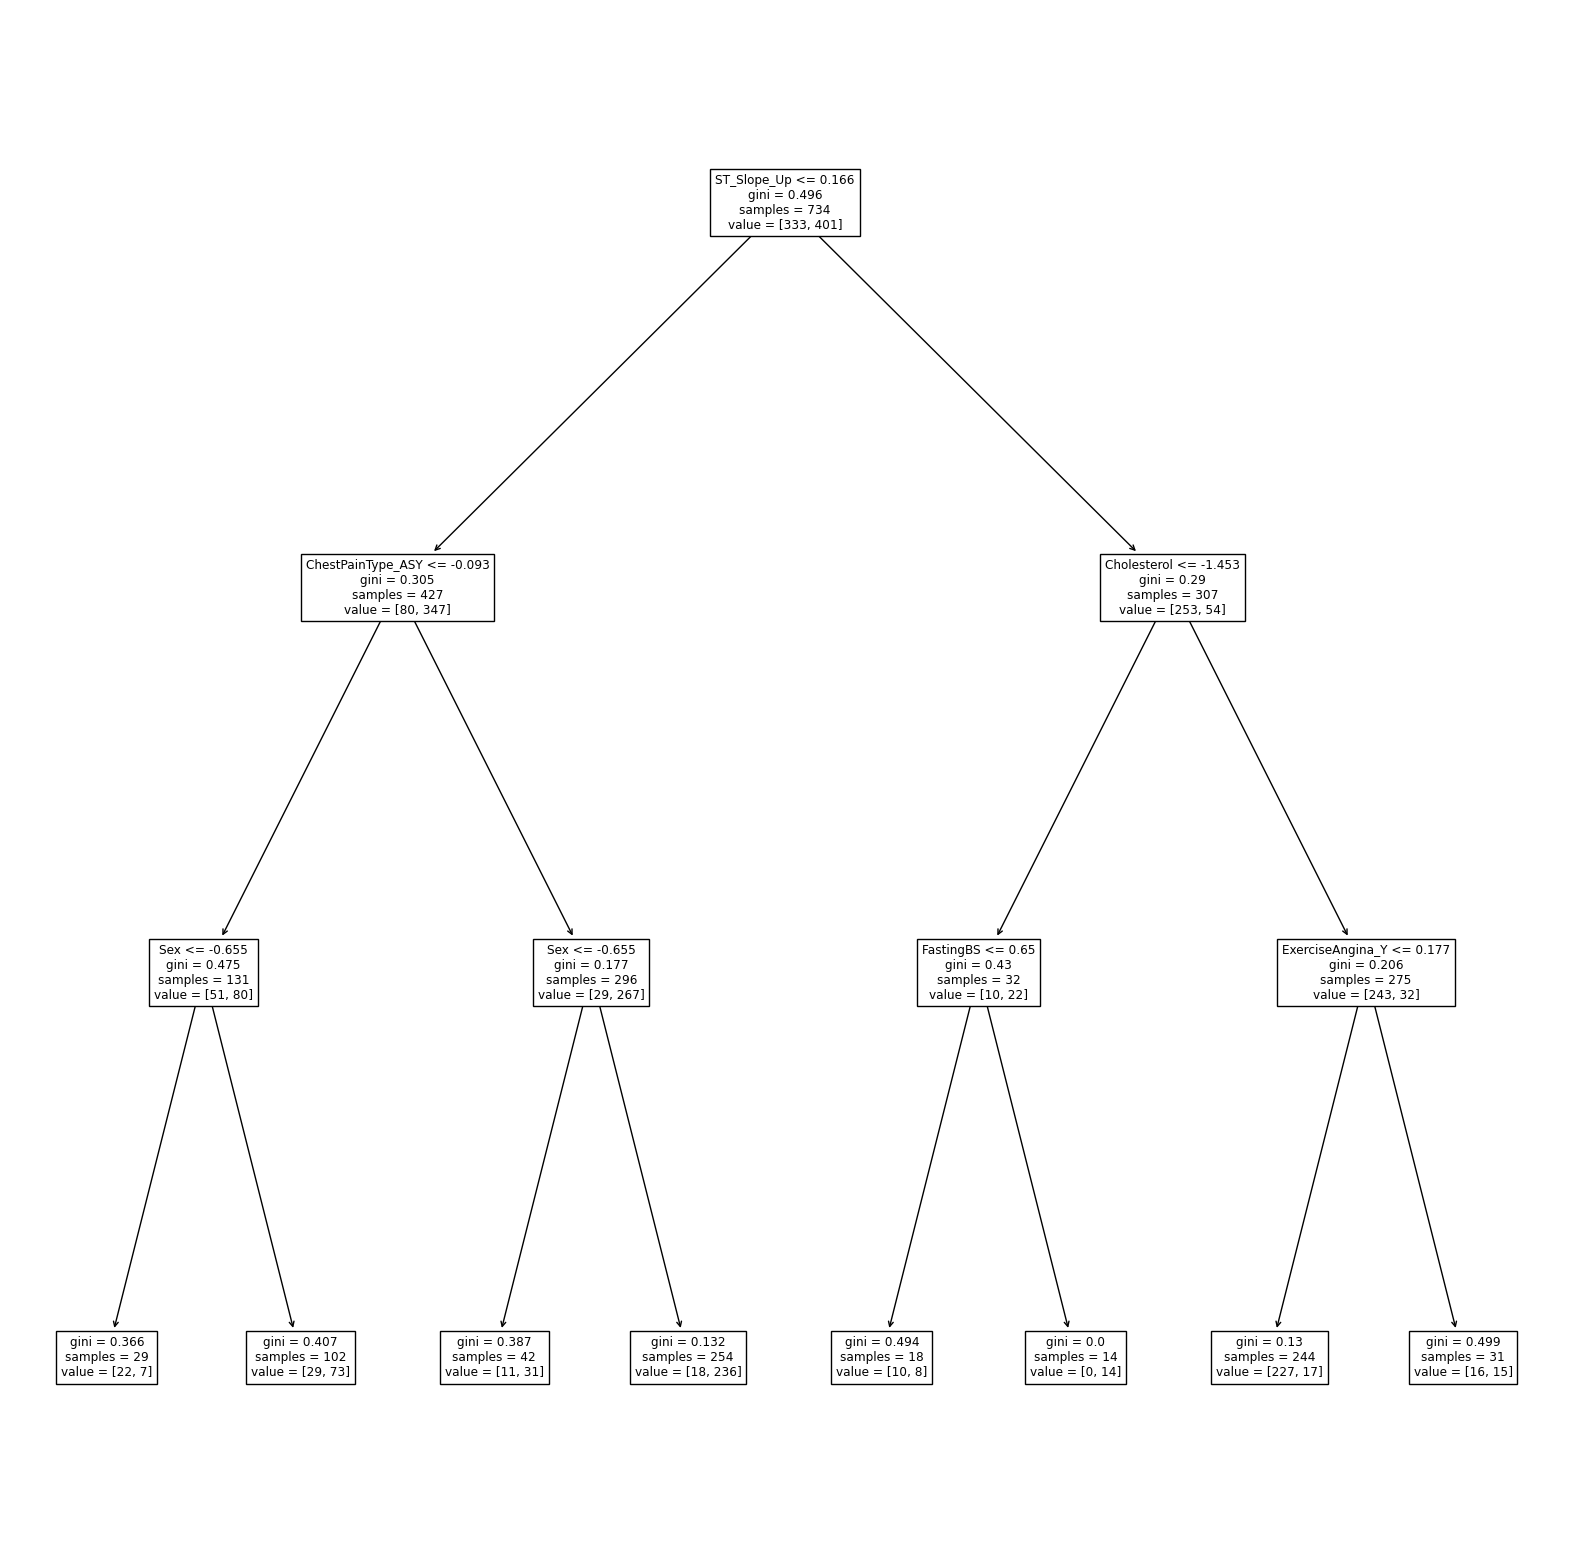

In [54]:
from sklearn.tree import plot_tree
plt.figure(figsize =(20,20))
plot_tree(My_model, feature_names=X.columns);
plt.show()

In [55]:
acc = accuracy_score(y_test, y_pred)
acc

0.8478260869565217

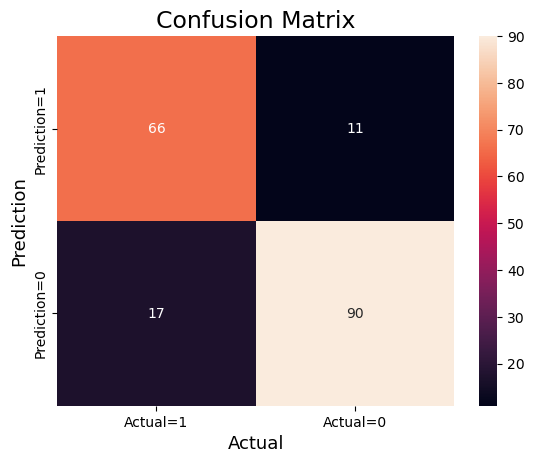

In [56]:
from sklearn.metrics import confusion_matrix
my_model=confusion_matrix(y_test,y_pred)
sns.heatmap(my_model,annot=True,fmt='g',
            yticklabels=['Prediction=1','Prediction=0'],
            xticklabels=['Actual=1','Actual=0'])
                         
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

## 2. Random Forest

In [57]:
RandomForest_model=RandomForestClassifier(n_estimators = 100,max_depth=16)
RandomForest_model.fit(X_train_scaler,Y_train)
y_pred=RandomForest_model.predict(x_test_scaler)

In [58]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.875

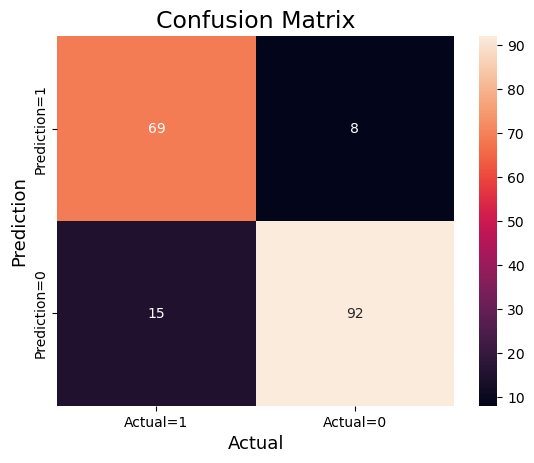

In [59]:
RandomForest_model=confusion_matrix(y_test,y_pred)
sns.heatmap(RandomForest_model,annot=True,fmt="g",
           yticklabels=['Prediction=1','Prediction=0'],
           xticklabels=['Actual=1','Actual=0'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

## 3. XGBOOST

In [39]:
'''!pip install XGBOOST'''

'!pip install XGBOOST'

In [40]:
from xgboost import XGBClassifier

In [60]:
xgb_model = XGBClassifier(objective="binary:logistic", random_state=42,n_estimators = 500,)

xgb_model.fit(X_train_scaler, Y_train)

y_pred = xgb_model.predict(x_test_scaler)

accuracy1 = accuracy_score(y_test, y_pred)
accuracy1

0.875

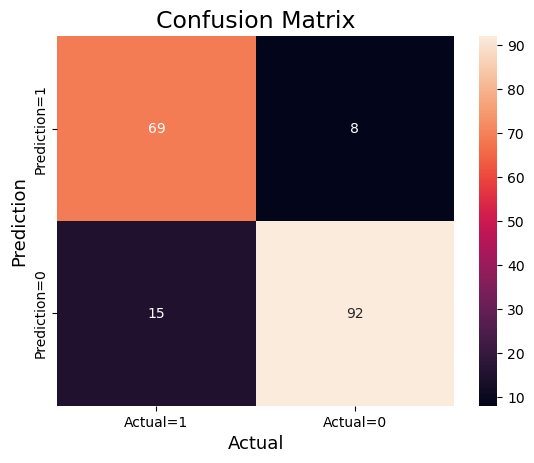

In [61]:
xgb_model=confusion_matrix(y_test,y_pred)
sns.heatmap(xgb_model,annot=True,fmt="g",
           yticklabels=['Prediction=1','Prediction=0'],
           xticklabels=['Actual=1','Actual=0'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()